In [48]:
import numpy as np
import matplotlib.pyplot as plt

## Plan for this afternoon

* Numpy
* Working with arrays
* Scipy
* Fitting curves
* Numerical integration

#### Numpy

Numpy is one of the most widely used Python packages for scientific computing. 
Almost (if not all) Python programs that you will write will make use of Numpy.
The Numpy website has provided some specific examples of scientific research that made use of Numpy:

* First image of a Black Hole: https://numpy.org/case-studies/blackhole-image/
* Discovery of Gravitational Waves: https://numpy.org/case-studies/gw-discov/

Among the things you can do with Numpy:

* Mathematical and logical opreations on arrays
* Fourier transforms
* Linear algebra operations


#### What is an array?

We can think of an array as a vector or a list of numbers. 

For example, let's imagine that you throw a ball from the top of a building (height $y_{o}= 80m$) with a horizontal velocity of $v_{o,x}=5m/s$. You would like to model the position (vertical and horizontal displacement) of the ball as a function of time. Let's ignore air-resistance for now and recall $g=9.81 m/s^{2}$.

Using kinematics equations for constant acceleration and constant velocity, we have that the horizontal and vertical positions of the ball are given by the following equations:

$y(t) = y_{o} - \frac{1}{2}gt^{2}$ 


$x(t) = v_{o,x}t $


We can pick a time, say $t=2s$ and calculate the vertical and horizontal positions at that time. If we are very motivated, we can try to do the same for five different times. But what if we wanted to know the positions at 100 diferent times? Doing the calculation again and again for each time value is tedious!

Let your computer do the boring (and repetitive) work by using Numpy.

First, let's assume you would like to know the positions for all the time values between 0 an 4 seconds in increments of 0.1 seconds, i.e. $[0,0.1,0.2,...3.9,4.0]$. You can create a numpy array, which is just a list of numbers:

In [35]:
t_array = np.arange(0,4.1,0.1)

In the line above, the first number is the start of the list, the second number is the end and the third number is the step size.
This is what t_array looks like:

In [36]:
print(t_array)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


Now, let's create variables for all the other quantities in this kinematics problem. The variables are just single numbers, not arrays.

In [37]:
g = 9.81 #m/s^2  GRAVITY
y_0 = 80 #m      BUILDIG HEIGHT
v_x0 = 5 #m/s    HORIZONTAL VELOCITY OF THE BALL

Recall, to calculate the horizontal displacement of the ball we need to use this equation:

$x(t) = v_{o,x}t $ 

To implement this using Numpy, we multiply the time array by the horizontal velocity variable and store the result in a different array:

In [38]:
x_array = v_x0 * t_array

What does x_array look like?

In [39]:
print(x_array)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20. ]


x_array is also a list (an array) of numbers. What did we do when we multiplied v_x0 by t_array? We just multiplied each element in the time array by the horizontal velocity number.

You can also square each element of an array as follows:

In [40]:
a = np.arange(0,5,1)
a_squared = a**2  #This is how you square an array

print("a = ",a ,"\na^2=",a_squared )



a =  [0 1 2 3 4] 
a^2= [ 0  1  4  9 16]


Finally, you can also add or subtract the same number to each of the elements in an array:

In [41]:
b = np.arange(0,10,1)
n = 2.3 #this is the number we want to add (or subtract)
b_minus_n = b-n 
b_plus_n = b+n

print("b = ",b,"\nb+n = ", b_plus_n)
print("b = ",b,"\nb-n = ", b_minus_n)


b =  [0 1 2 3 4 5 6 7 8 9] 
b+n =  [ 2.3  3.3  4.3  5.3  6.3  7.3  8.3  9.3 10.3 11.3]
b =  [0 1 2 3 4 5 6 7 8 9] 
b-n =  [-2.3 -1.3 -0.3  0.7  1.7  2.7  3.7  4.7  5.7  6.7]


#### Exercise 1

Now is your turn to use arrays to calculate the vertical displacement of the ball from times 0 to 4 seconds (in steps of 0.1 seconds) using the following formula:

$y(t) = y_{o} - \frac{1}{2}gt^{2}$ 

Recall, we had already stored the variables for $y_{o}$ and $g$ above so there is no need to declare this variables again. Scroll back up and find the code block where we declared these variables.

Recall also, we already made an array for time and called it t_array.

(store the vertical displacement of the ball as an array called y_array).

In [46]:
###Your code goes here ####

##SOLUTION

y_array = y_0 - (0.5)*g*t_array**2

print(y_array)

[80.      79.95095 79.8038  79.55855 79.2152  78.77375 78.2342  77.59655
 76.8608  76.02695 75.095   74.06495 72.9368  71.71055 70.3862  68.96375
 67.4432  65.82455 64.1078  62.29295 60.38    58.36895 56.2598  54.05255
 51.7472  49.34375 46.8422  44.24255 41.5448  38.74895 35.855   32.86295
 29.7728  26.58455 23.2982  19.91375 16.4312  12.85055  9.1718   5.39495
  1.52   ]


Sanity check. The path that a ball falling from the building with an initial horizontal velocty is a parabola. How can we check if the horizontal and vertical displacements of the ball indeed follow that trajectory?

Let's plot them (no worries if the following piece of code does not make sense, we will go over how to plot arrays later this week).

Text(0, 0.5, 'Vertical displacement (m)')

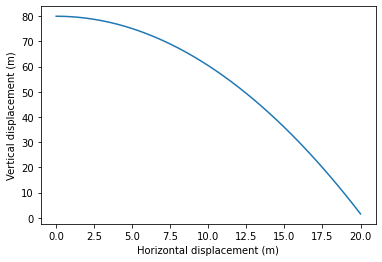

In [57]:
plt.plot(x_array,y_array)
plt.xlabel("Horizontal displacement (m)")
plt.ylabel("Vertical displacement (m)")
plt.title("")

### Array and matrix multiplication

So far we have only seen examples where we multiply an array by a single number, or where we add or subtract one number to each element in an array. 

However, it is possible to add an array to another, or multiply to arrays with each other.

The only requirement is that both arrays need to have the same length or shape. 